# Dataset Download

In [5]:
import pandas as pd
import numpy as np

ds = pd.read_csv("Important_files\heart.csv")
ds

<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
C:\Users\samue\AppData\Local\Temp\ipykernel_22544\3290915555.py:4: SyntaxWarning: invalid escape sequence '\h'
  ds = pd.read_csv("Important_files\heart.csv")


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
ds.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
ds.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
ds.duplicated().sum()

np.int64(0)

In [10]:
ds.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

## Converting categorical features into integers.

In [11]:
object_columns = ds.select_dtypes(object).columns
object_columns


Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [12]:
for column in object_columns:
   print(ds[column].unique())
   ds[column].replace(ds[column].unique(), range(ds[column].nunique()), inplace=True)
   print(f'{ds[column].unique()}')
   print()

['M' 'F']
[0 1]

['ATA' 'NAP' 'ASY' 'TA']
[0 1 2 3]

['Normal' 'ST' 'LVH']
[0 1 2]

['N' 'Y']
[0 1]

['Up' 'Flat' 'Down']
[0 1 2]



C:\Users\samue\AppData\Local\Temp\ipykernel_22544\525186729.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds[column].replace(ds[column].unique(), range(ds[column].nunique()), inplace=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_22544\525186729.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [13]:
ds

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [14]:
ds['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

## Cholesterol column adjustement
We know that cholesterol count cannot be 0. We can impute a proper value thanks to KNN imputer.
Note that the KNN imputer works only for nan vallues.

In [15]:
ds['Cholesterol'].replace(0, np.nan, inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_22544\1508772719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['Cholesterol'].replace(0, np.nan, inplace=True)


In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
heart_df = pd.DataFrame(imputer.fit_transform(ds), columns=ds.columns)
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,0.0,0.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0
1,49.0,1.0,1.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0,1.0
2,37.0,0.0,0.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0,0.0
3,48.0,1.0,2.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,1.0,1.0
4,54.0,0.0,1.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,0.0,3.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,1.0,1.0
914,68.0,0.0,2.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,1.0,1.0
915,57.0,0.0,2.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,1.0,1.0
916,57.0,1.0,0.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,1.0,1.0


In [17]:
heart_df['Cholesterol'].isna().sum()

np.int64(0)

## RBP adjustements

In [18]:
heart_df['RestingBP'][heart_df['RestingBP'] == 0]

449    0.0
Name: RestingBP, dtype: float64

In [19]:
from sklearn.impute import KNNImputer
ds['Cholesterol'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
heart_df = pd.DataFrame(imputer.fit_transform(ds), columns=ds.columns)
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,0.0,0.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0
1,49.0,1.0,1.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0,1.0
2,37.0,0.0,0.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0,0.0
3,48.0,1.0,2.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,1.0,1.0
4,54.0,0.0,1.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,0.0,3.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,1.0,1.0
914,68.0,0.0,2.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,1.0,1.0
915,57.0,0.0,2.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,1.0,1.0
916,57.0,1.0,0.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,1.0,1.0


In [20]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    float64
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    float64
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    float64
 11  HeartDisease    918 non-null    float64
dtypes: float64(12)
memory usage: 86.2 KB


## Gotta change to int
Execpt for OldPeak

In [21]:
withoutOldPeak = heart_df.columns
withoutOldPeak = withoutOldPeak.drop('Oldpeak')
heart_df[withoutOldPeak] = heart_df[withoutOldPeak].astype('int32')

In [22]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(11)
memory usage: 46.7 KB


# Data Visualization

In [23]:
import plotly.express as px

In [24]:
px.line(heart_df.corr()['HeartDisease'][:-1].sort_values())

In [25]:
px.pie(heart_df, names='HeartDisease', title='Percentage of HeartDisease classes distribution')

### Violin plot

In [26]:
px.violin(heart_df, x='HeartDisease', y='MaxHR', color='HeartDisease')

In [27]:
px.violin(heart_df, x='HeartDisease', y='Oldpeak', color='HeartDisease')

### Sunburst plot

In [28]:
px.sunburst(heart_df, path=['HeartDisease', 'Age'])

In [29]:
px.sunburst(heart_df, path=['HeartDisease', 'RestingBP'])

In [30]:
px.sunburst(heart_df, path=['HeartDisease', 'MaxHR'])

### Histograms

In [31]:
px.histogram(heart_df, x='Age', color='HeartDisease')

In [32]:
px.histogram(heart_df, x='Sex', color='HeartDisease')

In [33]:
px.histogram(heart_df, x='ChestPainType', color='HeartDisease')

In [34]:
px.histogram(heart_df, x='FastingBS', color='HeartDisease')

In [35]:
px.histogram(heart_df, x='ST_Slope', color='HeartDisease')

In [36]:
px.histogram(heart_df, x='ExerciseAngina', color='HeartDisease')

# Model Training

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    heart_df.drop('HeartDisease', axis=1),
    heart_df['HeartDisease'],
    test_size=0.2,
    random_state=42,
    stratify=heart_df['HeartDisease']
)

## Logistic Regression

## SVM

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'svm__C': 1, 'svm__class_weight': None, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

 Performance SVM
Accuracy:  0.8369565217391305
F1_score:  0.8369565217391305
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        82
           1       0.85      0.85      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



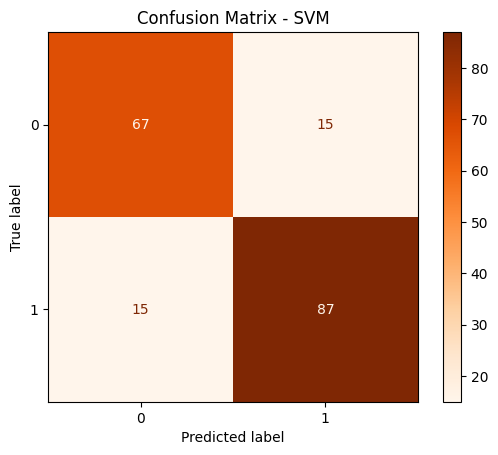

['svm.pkl']

In [39]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import joblib

# === Creation of the classifier ===

'''
#No Pipeline

svm = SVC(random_state=42)

svm_param_grid = {
    "C": [0.1, 1, 10, 50, 100],
    "gamma": [1, 0.1, 0.01, 0.001, "scale"],
    "kernel": ["linear", "rbf"],
    "class_weight": [None, "balanced"]
}

svm_grid = GridSearchCV(
    svm,
    svm_param_grid, 
    cv=3,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

'''
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

svm_param_grid = {
    "svm__C" : [0.1, 1, 10, 50, 100],
    "svm__gamma": [1, 0.1, 0.01, 0.001, "scale"],
    "svm__kernel": ["linear", "rbf"],
    "svm__class_weight": [None, "balanced"]
}

svm_grid = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    cv=3,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

svm_clf = svm_grid.fit(X_train, y_train)
print("Best parameters found: ", svm_clf.best_params_)

svm_best_model = svm_clf.best_estimator_

# === Prediction ===
svm_y_pred = svm_best_model.predict(X_test)

print("\n Performance SVM")
print("Accuracy: ", accuracy_score(y_test, svm_y_pred))
print("F1_score: ", f1_score(y_test, svm_y_pred, average="weighted"))
print(classification_report(y_test, svm_y_pred))

# === plotting of the results ===
cm = confusion_matrix(y_test, svm_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title('Confusion Matrix - SVM')
plt.show()

# === Saving Model ===
joblib.dump(svm_best_model, "svm.pkl")

## DT

## RFT

## XGBoost

## NN